# Grover's Search Algorithm using Cirq

Grover's search algorithm solves the problem of an untructured search.
When there is N number of possible input values, the classical algorithm requries  $O(N)$ evaluations while the Grover's algorithm requires roughly $ O(\sqrt N)$ evaluations. The algorithm can be considered generic as it does not use list's internal structure which gives a quadratic speed. The algorithm consists of the following steps:

    1. Initialization of the qubits in the ∣0⟩ state
    2. Uniform Superposition of all basis inputs
    3. Execution of the Oracle
    4. Application of Grover's diffusion operator (inversion about the mean)
    5. Repetitions of step 3 and 4
    6. Measurement

Circuit diagram:
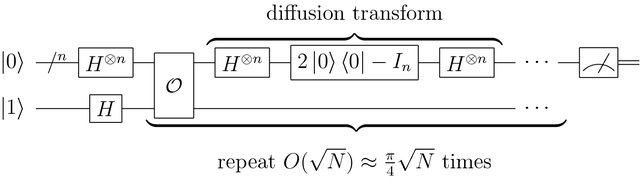

### Problem:
__Solving 2x2 binary Sudoku:__
* No column may contain the same value twice.
* No row may contain the same value twice.
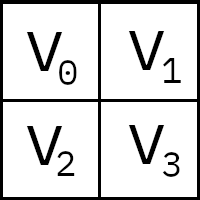

There are two possible solutions for this problem: 1001 OR 0110:
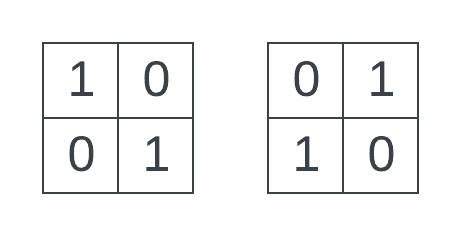

In [1]:
# import all necessary objects and methods for quantum circuits
import cirq
from cirq.circuits import InsertStrategy
import numpy as np
from numpy import pi
import math
import matplotlib.pyplot as plt

0: ───H───@───@───@───────────@───H───X───@───X───H───@───@───@───────────@───H───X───@───X───H───M('result')───
          │   │   │           │           │           │   │   │           │           │           │
1: ───H───@───┼───┼───@───@───@───H───X───@───X───H───@───┼───┼───@───@───@───H───X───@───X───H───M─────────────
          │   │   │   │   │   │           │           │   │   │   │   │   │           │           │
2: ───H───┼───@───┼───@───@───@───H───X───@───X───H───┼───@───┼───@───@───@───H───X───@───X───H───M─────────────
          │   │   │   │   │   │           │           │   │   │   │   │   │           │           │
3: ───H───@───@───@───@───┼───┼───H───X───Z───X───H───@───@───@───@───┼───┼───H───X───Z───X───H───M─────────────
          │   │   │   │   │   │                       │   │   │   │   │   │
a: ───X───X───X───X───X───X───X───────────────────────X───X───X───X───X───X─────────────────────────────────────
Counter({6: 279, 9: 270, 13: 41, 7: 37, 14: 35, 4: 33, 5: 3

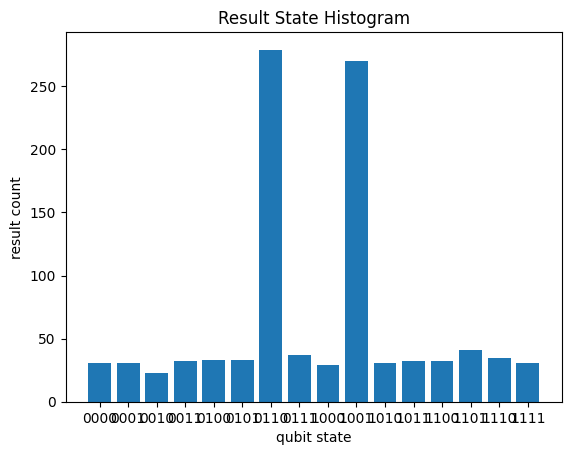

In [2]:
# The problem to find the solution of binary Sudoku
# We previously know that the winner states are 1001 and 0110
# So we will implement an oracle to phase kickback these to states

# create the registers and circuit

n = 4 
q = cirq.LineQubit.range(n)
a = cirq.NamedQubit("a")
circuit = cirq.Circuit()

# Define a function to apply H-gate on a given list of qubits
def Htransform(circuit, qubits):
    for q in qubits:
        circuit.append(cirq.H(q), strategy=InsertStrategy.INLINE)
    return circuit

# Define a function to apply X-gate on a given list of qubits
def Xgate(circuit, qubits):
    for q in qubits:
        circuit.append(cirq.X(q), strategy=InsertStrategy.INLINE)
    return circuit

# assign the ancilla qubit to be in state |1>
circuit.append(cirq.X(a))

Htransform(circuit, q)

# Iteration loop
# No. of iteration = (pi/4)*sqrt(2**n/no. of solutions)
# Here in Binary Sudoku problem we have 2 solutions 1001 & 0110 and no.

# Oracle to mark the 2 solution states 1001 & 0110:
oracle= [ cirq.X(a).controlled_by(q[0], q[1], q[3]),
       cirq.X(a).controlled_by(q[0], q[2], q[3]),
       cirq.X(a).controlled_by(q[0], q[3]),
       cirq.X(a).controlled_by(q[1], q[2], q[3]),
       cirq.X(a).controlled_by(q[1], q[2]),
       cirq.X(a).controlled_by(q[0], q[1], q[2])]
i = 1
while i <= (pi/4)*math.sqrt(2**n/2):
    # Oracle
    circuit.append(oracle, strategy=InsertStrategy.INLINE)

    # Grover's Diffusion Operator
    Htransform(circuit, q)
    Xgate(circuit, q)
    circuit.append(cirq.Z(q[n-1]).controlled_by(*q[:n-1]))
    Xgate(circuit, q)
    Htransform(circuit, q)

    i += 1

circuit.append(cirq.measure(*q, key="result"))

print(circuit)

# This is the local simulator 
simulator = cirq.Simulator()

# circuit is the circuit to be simulated
# shots is the how many times we want to run the circuit
samples = simulator.run(circuit, repetitions= 1000)


# Get the results as a dictionary
counts = samples.histogram(key="result")

print(counts)

# define a function to transform from decimal to binary:
def bitstring(bits):
    return "".join(str(int(b)) for b in bits)

counts = samples.histogram(key="result",fold_func=bitstring)
print(counts)


# Plot a histogram of the result
cirq.plot_state_histogram(counts, plt.subplot())
plt.show()